In [1]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [1]:
### Load & Save data
# bike = pd.read_excel('bike_201811.xlsx')
# bike.to_pickle('bike_102811.pickle')

In [2]:
bike = pd.read_pickle('bike_102811.pickle')

In [9]:
bike.shape

(465715, 13)

In [3]:
bike.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-11-01,0,1361,홍익중고 입구,정기권,F,~10대,1,44.02,0.40,1710,9
1,2018-11-01,0,1403,중화빌딩 앞 (동부시장),정기권,F,~10대,2,21.73,0.22,930,7
2,2018-11-01,0,729,서부식자재마트 건너편,정기권,F,20대,1,36.59,0.36,1540,10
3,2018-11-01,0,747,목동3단지 상가,정기권,F,20대,1,12.47,0.15,630,4
4,2018-11-01,0,505,자양사거리 광진아크로텔 앞,정기권,F,20대,1,22.05,0.27,1160,7


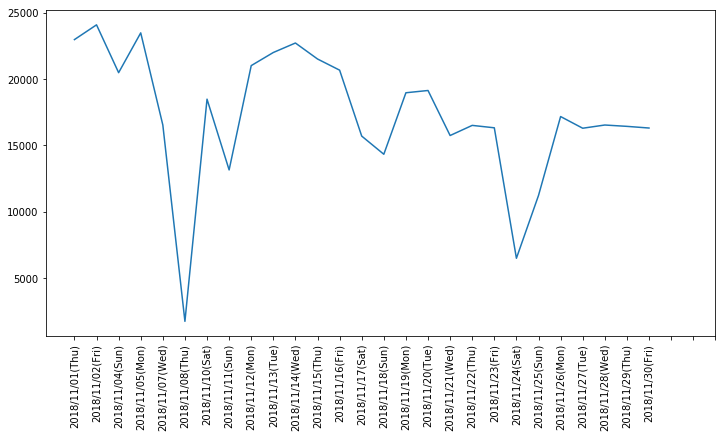

In [6]:
bike_day = bike['대여일자'].value_counts().sort_index()

plt.figure(figsize=[12,6])
plt.plot(bike_day.values)
plt.xticks(range(30), bike_day.index.map(lambda d: d.strftime('%Y/%m/%d(%a)')), rotation=90)
pass

In [7]:
bike['속도'] = bike['이동거리']/bike['이동시간']
bike.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,속도
0,2018-11-01,0,1361,홍익중고 입구,정기권,F,~10대,1,44.02,0.40,1710,9,190.000000
1,2018-11-01,0,1403,중화빌딩 앞 (동부시장),정기권,F,~10대,2,21.73,0.22,930,7,132.857143
2,2018-11-01,0,729,서부식자재마트 건너편,정기권,F,20대,1,36.59,0.36,1540,10,154.000000
3,2018-11-01,0,747,목동3단지 상가,정기권,F,20대,1,12.47,0.15,630,4,157.500000
4,2018-11-01,0,505,자양사거리 광진아크로텔 앞,정기권,F,20대,1,22.05,0.27,1160,7,165.714286


In [ ]:
dist = bike['이동거리']
ti = bike['이동시간']

Text(0,0.5,'distance(m)')

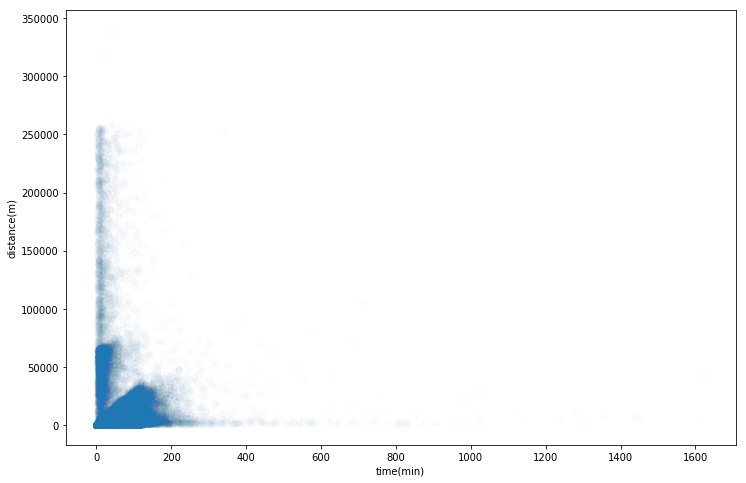

In [14]:
plt.figure(figsize=[12,8])
plt.scatter(bike['이동시간'],bike['이동거리'], alpha=0.01)
plt.xlabel('time(min)')
plt.ylabel('distance(m)')

In [15]:
bike2 = bike[(dist<20000) & (ti<120)]
bike2.shape # 465715 => 452551

(452551, 13)

Text(0,0.5,'distance(m)')

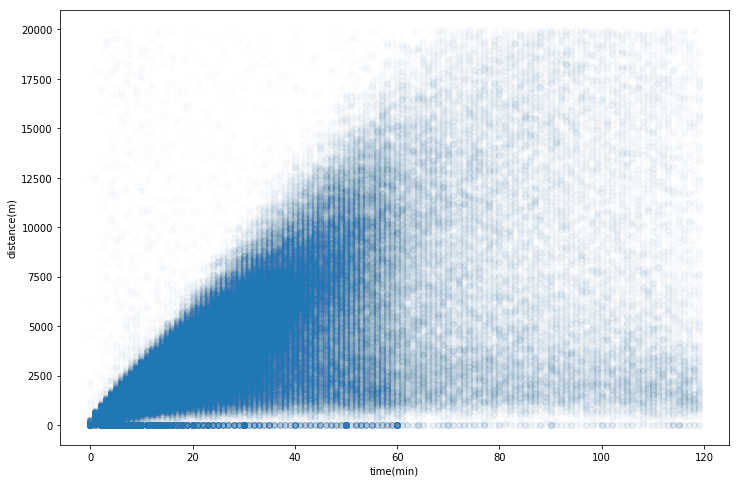

In [16]:
plt.figure(figsize=[12,8])
plt.scatter(bike2['이동시간'],bike2['이동거리'], alpha=0.01)
plt.xlabel('time(min)')
plt.ylabel('distance(m)')

Text(0,0.5,'distance(m)')

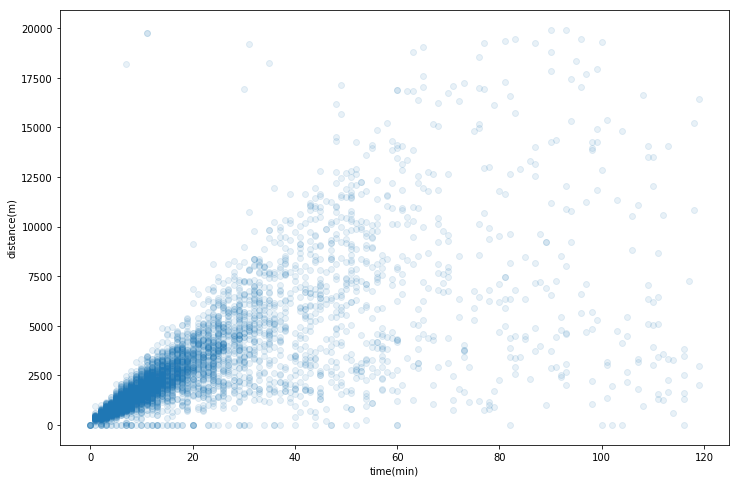

In [19]:
bike3 = bike2.iloc[np.random.choice(range(len(bike2)),5000)]

plt.figure(figsize=[12,8])
plt.scatter(bike3['이동시간'],bike3['이동거리'], alpha=0.1)
plt.xlabel('time(min)')
plt.ylabel('distance(m)')

### 평균속도 분석

In [21]:
30000/60

50.0

Text(0,0.5,'velocity(miter/min)')

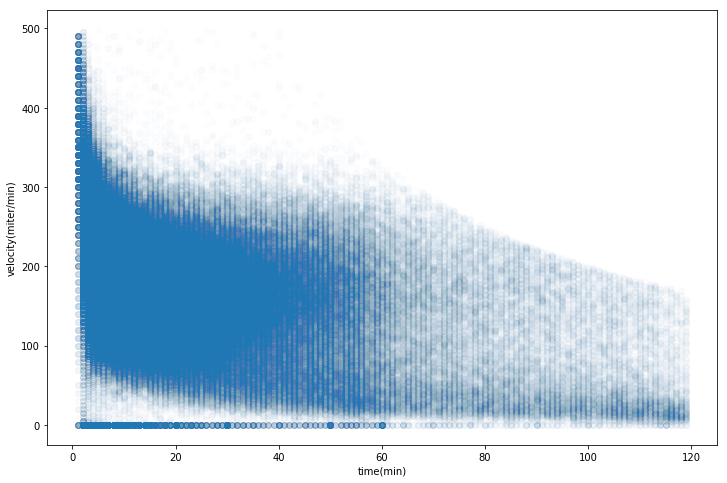

In [24]:
bike4 = bike2[bike2['속도']<500] # 30km/hour

plt.figure(figsize=[12,8])
plt.scatter(bike4['이동시간'],bike4['속도'], alpha=0.01)
plt.xlabel('time(min)')
plt.ylabel('velocity(miter/min)')

Text(0,0.5,'velocity(miter/min)')

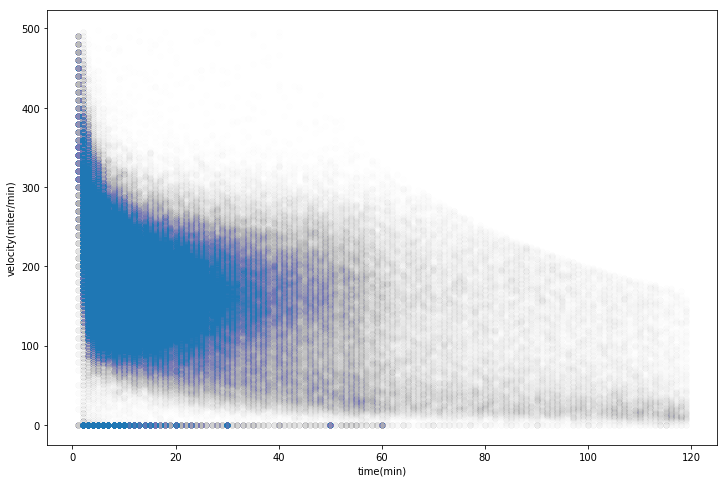

In [27]:
plt.figure(figsize=[12,8])
plt.scatter(bike4['이동시간'],bike4['속도'], alpha=0.002)
plt.xlabel('time(min)')
plt.ylabel('velocity(miter/min)')

- 3000개의 샘플을 뽑아 산점도 그리기

Text(0,0.5,'velocity(km/hour)')

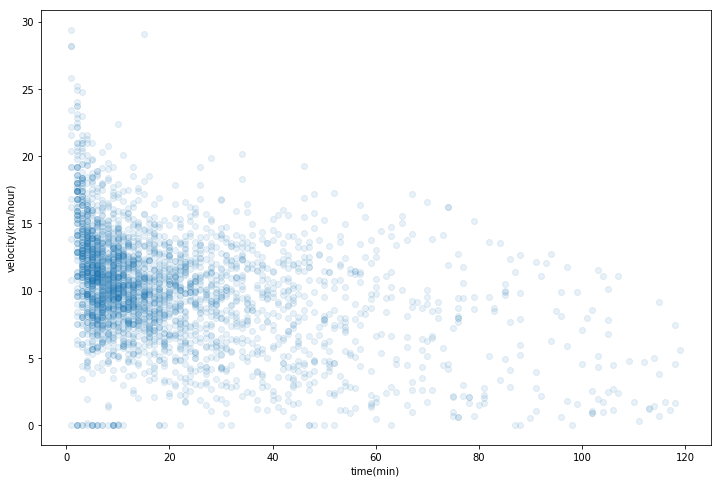

In [31]:
bike5 = bike4.iloc[np.random.choice(range(len(bike4)),3000)]

plt.figure(figsize=[12,8])
plt.scatter(bike5['이동시간'],bike5['속도']*(60/1000), alpha=0.1)
plt.xlabel('time(min)')
plt.ylabel('velocity(km/hour)')